In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

In [2]:
status = pd.read_csv('/home/kyohei/bike_share/data_split_2015/San Francisco_station_status_stid67.csv')

In [3]:
station = pd.read_csv('/home/kyohei/bike_share_data/201608_station_data.csv')

In [4]:
#datetime変換
status.time = status.time.apply(lambda x:pd.to_datetime(x))

In [5]:
#曜日
status['dayofweek'] = status.time.apply(lambda x:x.dayofweek)

#日付
status['date'] = status.time.apply(lambda x:x.date())

#時間
status['hour_minute'] = status.time.apply(lambda x:datetime.time(x.hour,x.minute))

#available bikes rate
status['op_rate_bikes'] = status.bikes_available / float(station[station.station_id==67]['dockcount'].values)

#available docks rate
status['op_rate_docks'] = status.docks_available / float(station[station.station_id==67]['dockcount'].values)

In [6]:
#平日データに限定
status_sub = status[status.dayofweek<=4]

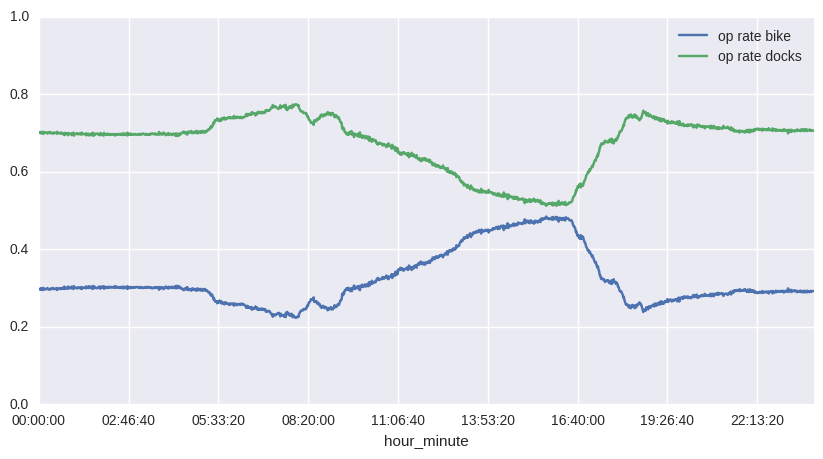

In [10]:
#平均的な振る舞い
ax = plt.axes()
status_sub.groupby('hour_minute')['op_rate_bikes'].mean().plot(ax=ax,figsize=(10,5),label='op rate bike')
status_sub.groupby('hour_minute')['op_rate_docks'].mean().plot(ax=ax,label='op rate docks')
plt.ylim([0,1])
plt.legend()

In [14]:
status_zero = status_sub[status_sub.hour_minute==datetime.time(0,0)]

status_high_bikes_date = status_zero[status_zero.bikes_available>=18]['date']

status_high_sub = status_sub[status_sub.date.isin(status_high_bikes_date)]

status_high_sub.head()

,Unnamed: 0,station_id,bikes_available,docks_available,time,dayofweek,date,hour_minute,op_rate_bikes,op_rate_docks
20160,27895743,67,24,3,2015-09-15 00:00:03,1,2015-09-15,00:00:00,0.888889,0.111111
20161,27895744,67,24,3,2015-09-15 00:01:02,1,2015-09-15,00:01:00,0.888889,0.111111
20162,27895745,67,24,3,2015-09-15 00:02:02,1,2015-09-15,00:02:00,0.888889,0.111111
20163,27895746,67,24,3,2015-09-15 00:03:02,1,2015-09-15,00:03:00,0.888889,0.111111
20164,27895747,67,24,3,2015-09-15 00:04:03,1,2015-09-15,00:04:00,0.888889,0.111111


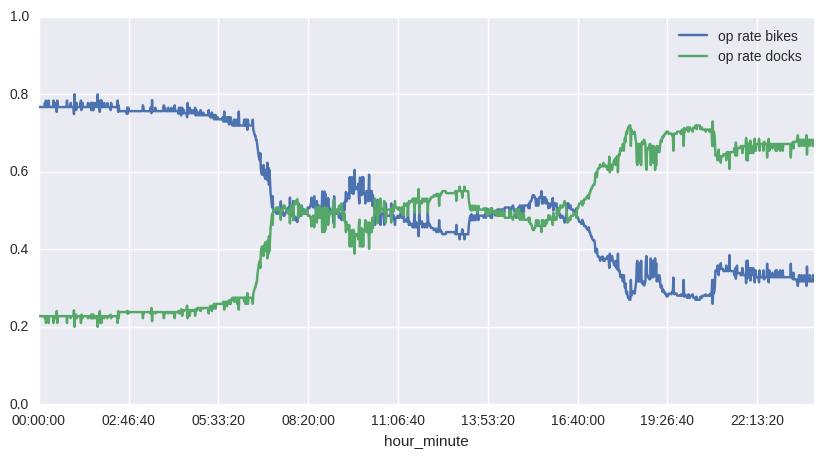

In [16]:
#0時に空きバイクの量が多い時の振る舞い
ax = plt.axes()
status_high_sub.groupby('hour_minute')['op_rate_bikes'].mean().plot(ax=ax,figsize=(10,5),label='op rate bikes')
status_high_sub.groupby('hour_minute')['op_rate_docks'].mean().plot(ax=ax,label='op rate docks')
plt.ylim([0,1])
plt.legend()

In [70]:
status_16 = status_sub[status_sub.hour_minute==datetime.time(16,0)]

status_high_docks_date = status_16[status_16.docks_available>=20]['date']

status_high_sub = status_sub[status_sub.date.isin(status_high_docks_date)]

status_high_sub.head()

,Unnamed: 0,station_id,bikes_available,docks_available,time,dayofweek,date,hour_minute,op_rate_bikes,op_rate_docks
18720,28919215,69,11,12,2015-09-14 00:00:02,0,2015-09-14,00:00:00,0.478261,0.521739
18721,28919216,69,11,12,2015-09-14 00:01:03,0,2015-09-14,00:01:00,0.478261,0.521739
18722,28919217,69,11,12,2015-09-14 00:02:02,0,2015-09-14,00:02:00,0.478261,0.521739
18723,28919218,69,11,12,2015-09-14 00:03:02,0,2015-09-14,00:03:00,0.478261,0.521739
18724,28919219,69,11,12,2015-09-14 00:04:02,0,2015-09-14,00:04:00,0.478261,0.521739


(0, 1)

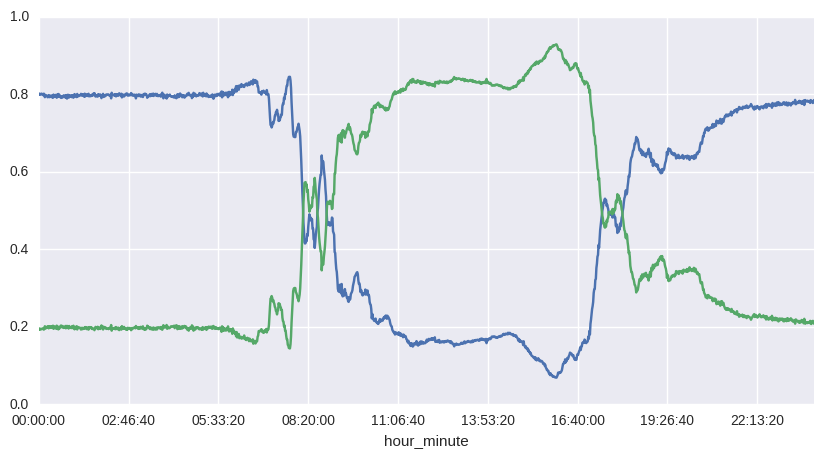

In [71]:
#16時に空きドックの量が多い時の振る舞い
ax = plt.axes()
status_high_sub.groupby('hour_minute')['op_rate_bikes'].mean().plot(ax=ax,figsize=(10,5))
status_high_sub.groupby('hour_minute')['op_rate_docks'].mean().plot(ax=ax)
plt.ylim([0,1])